In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
saved_model = load_model('/content/drive/MyDrive/models/cnn_adagrad_e45_bc16/model.h5')

In [ ]:
model = saved_model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 98, 98, 64)    1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 64)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 128)    221312    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 128)   0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 3, 22, 22, 256)    262400    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 11, 11, 256)   0

get list of all layers


In [ ]:
layer = model.layers
layer

In [ ]:
filters, biases = model.layers[0].get_weights()
print(layer[0].name, filters.shape)

conv3d (3, 3, 3, 1, 64)


In [ ]:
import matplotlib.pyplot as plt

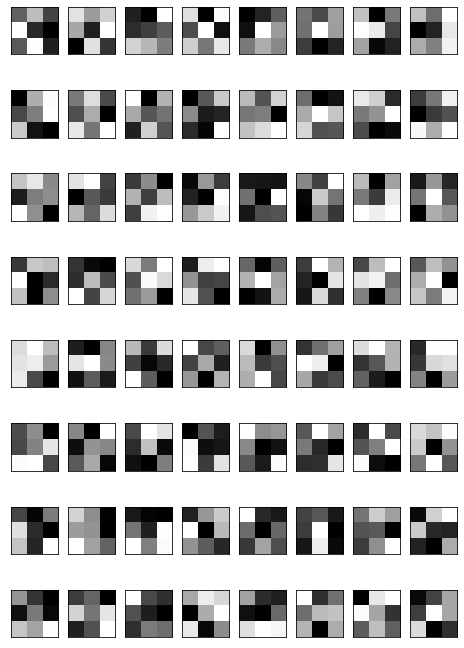

In [ ]:
fig1 = plt.figure(figsize=(8,12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :,0, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show() 

In [ ]:
conv_layer_index = [0,2,4]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_input (InputLayer)   [(None, 22, 100, 100, 1)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 20, 98, 98, 64)    1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 64)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 128)    221312    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 128)   0         
 3D)                                                             
                                                           

In [ ]:
columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()